In [125]:
from HeaderP import *
import Astraea

In [131]:
apoge=pd.read_pickle('../Data/Apogee_kepler_cm.pkl')
df=pd.read_pickle('../Data/APOGEE_Prot.pkl')
ages=readfits('../../SecondYear/apogee_astroNN-DR16-v1.fits')
ages

,APOGEE_ID,LOCATION_ID,TELESCOPE,RA_APOGEE,DEC_APOGEE,TEFF,TEFF_ERR,LOGG,LOGG_ERR,C_H,...,theta_phi,theta_phi_err,theta_z,theta_z_err,rl,rl_err,Energy,Energy_err,EminusEc,EminusEc_err
0,VESTA,1.0,apo1m,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2M00000002+7417074,5046.0,apo25m,0.000103,74.285408,3855.157227,49.542202,0.817739,0.188952,-0.065494,...,0.156882,0.004799,1.183869,0.053029,9.179817,0.149323,-36125.514493,786.841120,-53290.855192,349.118918
2,2M00000019-1924498,5071.0,apo25m,0.000832,-19.413851,5301.893066,87.216347,3.676076,0.287316,-0.231211,...,6.190612,0.020696,3.685223,0.032491,7.813145,0.170422,-43189.669301,801.581542,-55838.684879,192.400322
3,2M00000032+5737103,4424.0,apo25m,0.001335,57.619530,5731.417480,165.994400,2.851072,0.182911,-0.390399,...,0.106585,0.000682,4.110654,0.059737,8.953243,0.014118,-37972.494019,67.847124,-54460.159874,24.653441
4,2M00000032+5737103,4264.0,apo25m,0.001335,57.619530,5725.205566,159.599442,2.815395,0.218909,-0.476196,...,0.107246,0.000682,4.114248,0.060055,8.944326,0.014136,-38018.792895,67.938074,-54479.115463,24.631619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473302,2M23595756+8535275,5067.0,apo25m,359.989841,85.590996,5058.915039,74.910744,3.811991,0.332647,0.329254,...,0.074330,0.000192,2.201710,0.003951,9.067347,0.001673,-37046.466524,9.365413,-53880.826626,4.355623
473303,2M23595837+5700444,4264.0,apo25m,359.993224,57.012356,4892.823730,32.387299,2.413542,0.033932,-0.397376,...,0.483988,0.005541,5.501196,0.045717,12.510647,0.225068,-23508.481557,797.829500,-48605.532648,365.969703
473304,2M23595886-2009435,5071.0,apo25m,359.995258,-20.162107,5457.661133,115.059898,4.028604,0.508939,0.239907,...,6.182002,0.004209,4.910762,0.014647,8.225137,0.023995,-40535.943450,81.407036,-54660.428261,14.298320
473305,2M23595886+5726058,4424.0,apo25m,359.995265,57.434956,4852.323730,23.762592,2.430786,0.027727,-0.255256,...,0.246891,0.001724,3.616162,0.019596,8.667439,0.042496,-38955.897258,209.752796,-54547.797585,74.409333


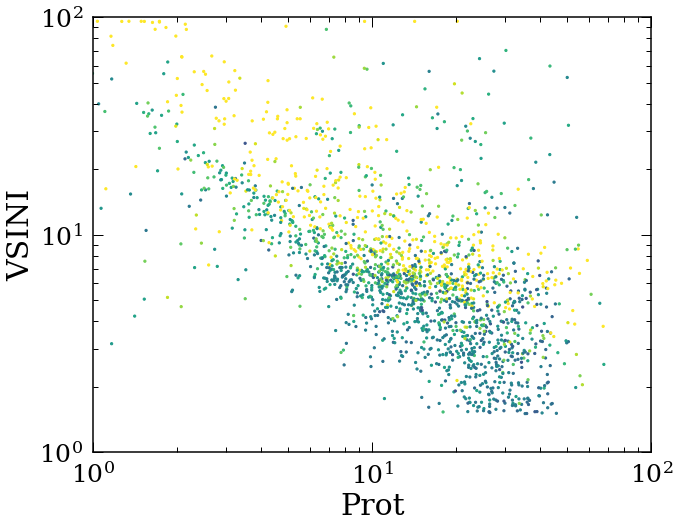

In [132]:
apoge=apoge.loc[apoge['Prot']>0].reset_index()
apoge=apoge.loc[apoge['VSINI']>0].reset_index()
plt.figure(figsize=(10,8))
plt.scatter(apoge['Prot'],apoge['VSINI'],c=apoge['radius_val'],s=5,vmin=0,vmax=2)
plt.xlabel('Prot')
plt.ylabel('VSINI')
plt.ylim([1,100])
plt.xlim([1,100])
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'VSINI')

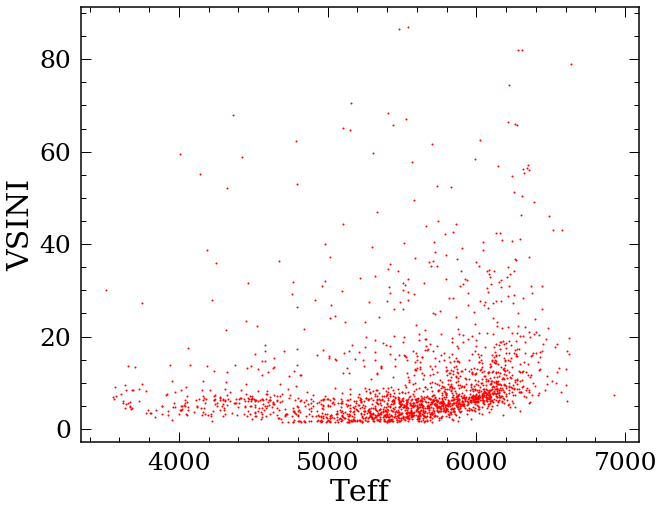

In [133]:
apoge=apoge.loc[apoge['TEFF']>0]
plt.figure(figsize=(10,8))
plt.scatter(apoge['TEFF'],apoge['VSINI'],c='r',s=1)
plt.xlabel('Teff')
plt.ylabel('VSINI')


In [134]:
df=df[[i for i in df.columns if 'age' not in i]]
df['Prot']=df['Prot_cannon']

In [135]:
df['APOGEE_ID']=df['ID']
df=pd.concat([df,apoge]).reset_index(drop=True)
df=df.drop_duplicates(subset='APOGEE_ID')


In [138]:
df=pd.merge(df,ages[['APOGEE_ID','age','age_total_error']],left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')
df

,APOGEE_ID_x,ID,M_H_cannon,TEFF_cannon,LOGG_cannon,Prot_cannon,radius_cannon,VSINI_cannon,M_H_err_cannon,TEFF_err_cannon,...,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist,age,age_total_error
0,2M00005343+0040594,2M00005343+0040594,-0.156467,5984.894487,4.306812,3.858361,0.895407,26.528016,0.070620,0.030784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.218682,2.065147
1,2M00021917+0142107,2M00021917+0142107,-0.034016,5079.506140,4.477082,7.630808,1.119993,11.294856,0.035705,0.015499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.675029,1.861890
2,2M00024876-0018006,2M00024876-0018006,-0.100265,4924.077521,4.688635,24.855807,0.609487,15.381693,0.030984,0.013736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.829245,2.102043
3,2M00033917+0204106,2M00033917+0204106,-0.181113,5892.900001,4.180698,8.887853,1.690836,54.922214,0.043290,0.021102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.816360,2.213106
4,2M00062867+6955129,2M00062867+6955129,-0.041287,5206.796780,4.445923,55.149756,1.595549,64.574831,0.057861,0.034954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.590408,4.593586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,10.784,10.536,10.457,none,0.048037,3.688004,2.098387
4337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,11.283,10.659,10.581,none,0.092620,11.121162,2.950535
4338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,11.041,10.857,10.797,none,0.073056,2.828768,1.519001
4339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,10.392,10.036,9.980,none,0.121739,5.856393,1.590663


In [139]:
protreal=apoge.loc[abs(apoge['M_H'])<0.05]
protreal=pd.merge(protreal,ages[['APOGEE_ID','age','age_total_error']],left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')
protreal

,level_0,index,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,...,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist,age,age_total_error
0,8,384957,apogee.apo25m.s.stars.K03_077+20.2M18422693+47...,apo25m.5003.K03_077+20.2M18422693+4722242,apogee.apo25m.s.r12-l33.K03_077+20.2M18422693+...,apStar-r12-2M18422693+4722242.fits,2M18422693+4722242,apo25m,5003,K03_077+20,...,0.0,0.0,4.0,10.175,9.975,9.897,none,0.225158,4.715823,2.032450
1,10,384978,apogee.apo25m.s.stars.K08_073+19.2M18423164+43...,apo25m.5008.K08_073+19.2M18423164+4316380,apogee.apo25m.s.r12-l33.K08_073+19.2M18423164+...,apStar-r12-2M18423164+4316380.fits,2M18423164+4316380,apo25m,5008,K08_073+19,...,0.0,0.0,0.0,9.952,9.708,9.672,none,0.059255,3.555048,1.666997
2,15,385309,apogee.apo25m.s.stars.K08_073+19.2M18433657+42...,apo25m.5008.K08_073+19.2M18433657+4236306,apogee.apo25m.s.r12-l33.K08_073+19.2M18433657+...,apStar-r12-2M18433657+4236306.fits,2M18433657+4236306,apo25m,5008,K08_073+19,...,0.0,0.0,0.0,10.127,9.779,9.700,none,0.083882,6.349337,1.605462
3,16,385311,apogee.apo25m.s.stars.K08_073+19.2M18433663+42...,apo25m.5008.K08_073+19.2M18433663+4236399,apogee.apo25m.s.r12-l33.K08_073+19.2M18433663+...,apStar-r12-2M18433663+4236399.fits,2M18433663+4236399,apo25m,5008,K08_073+19,...,0.0,0.0,0.0,8.970,8.768,8.722,none,0.090437,4.224582,1.885438
4,18,385377,apogee.apo25m.s.stars.K03_077+20.2M18434759+47...,apo25m.4408.K03_077+20.2M18434759+4709580,apogee.apo25m.s.r12-l33.K03_077+20.2M18434759+...,apStar-r12-2M18434759+4709580.fits,2M18434759+4709580,apo25m,4408,K03_077+20,...,0.0,0.0,0.0,11.479,10.836,10.703,none,0.068270,9.117860,2.210134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2110,436841,apogee.apo25m.s.stars.K14_080+08.2M20000459+43...,apo25m.5014.K14_080+08.2M20000459+4354503,apogee.apo25m.s.r12-l33.K14_080+08.2M20000459+...,apStar-r12-2M20000459+4354503.fits,2M20000459+4354503,apo25m,5014,K14_080+08,...,0.0,0.0,0.0,10.402,10.098,10.041,none,0.095314,4.690827,1.712391
520,2119,437277,apogee.apo25m.s.stars.K14_080+08.2M20012993+46...,apo25m.5014.K14_080+08.2M20012993+4604035,apogee.apo25m.s.r12-l33.K14_080+08.2M20012993+...,apStar-r12-2M20012993+4604035.fits,2M20012993+4604035,apo25m,5014,K14_080+08,...,0.0,0.0,0.0,11.446,11.152,11.112,none,0.092272,3.085504,1.651310
521,2122,437346,apogee.apo25m.s.stars.K14_080+08.2M20014237+45...,apo25m.5014.K14_080+08.2M20014237+4543291,apogee.apo25m.s.r12-l33.K14_080+08.2M20014237+...,apStar-r12-2M20014237+4543291.fits,2M20014237+4543291,apo25m,5014,K14_080+08,...,0.0,0.0,2.0,10.712,10.445,10.388,none,0.110884,3.843096,2.117279
522,2135,437771,apogee.apo25m.s.stars.K14_080+08.2M20031896+44...,apo25m.5014.K14_080+08.2M20031896+4410404,apogee.apo25m.s.r12-l33.K14_080+08.2M20031896+...,apStar-r12-2M20031896+4410404.fits,2M20031896+4410404,apo25m,5014,K14_080+08,...,0.0,0.0,3.0,11.049,10.696,10.612,none,0.122806,6.757500,1.735991


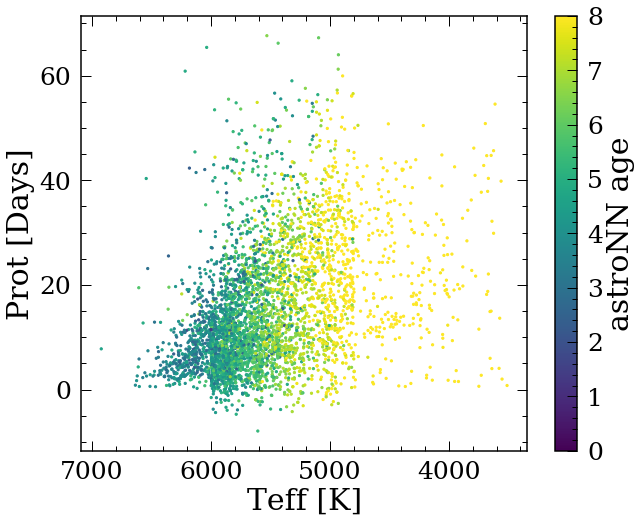

In [141]:
plt.figure(figsize=(10,8))
plt.scatter(df['TEFF'],df['Prot'],s=5,c=df['age'],vmin=0,vmax=8)
plt.xlabel('Teff [K]')
plt.ylabel('Prot [Days]')
plt.gca().invert_xaxis()
#plt.xlim([3000,7000])
#plt.ylim([0,50])
cb=plt.colorbar()
cb.set_label('astroNN age')



(1108, 368)


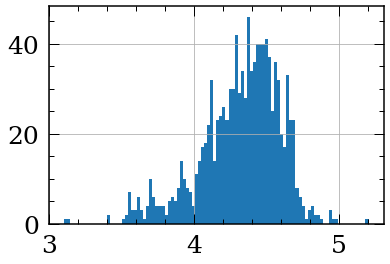

In [142]:
solarstars=df.loc[abs(df['M_H']+0.05)<0.05]
solarstars=solarstars.reset_index(drop=True)
solarstars=solarstars.loc[solarstars['LOGG']>-1000].reset_index(drop=True)
print(np.shape(solarstars))
solarstars['LOGG'].hist(bins=100)

In [143]:
def plotdiag(solarstars,element,protselect,window):
    plt.figure(figsize=(10,8))
    cm = plt.cm.get_cmap('viridis',10)

    plt.scatter(solarstars['age'],solarstars[element],s=5,c=solarstars['Prot'],
                cmap=cm,vmin=0,vmax=30)
    cb=plt.colorbar()
    cb.set_label('Predicted periods [days]')
    plt.xlabel('Age [Gyr]')
    plt.ylabel(element)
    plt.xlim([2,10])
    plt.ylim([-0.2,0.3])
    
    print(min(solarstars['Prot']),max((solarstars['Prot'])))
    
    cm = plt.cm.get_cmap('viridis',10)
    
    # all seperated by periods
    plt.figure(figsize=(10*(len(protselect)),10))
    for i in range(1,len(protselect)):
        plt.figure(figsize=(10,8))
        m1=(solarstars['Prot']>protselect[i]-window) & (solarstars['Prot']<protselect[i]+window)
        m2=(solarstars['age']<10)
        m=m1&m2

        plt.scatter(solarstars['age'][m],solarstars[element][m],
                s=10,c=solarstars['Prot'][m],cmap=cm,vmin=0,vmax=30)
        cb=plt.colorbar()
        cb.set_label('Predicted periods [days]')
        plt.xlabel('Age [Gyr]')
        plt.ylabel(element)
        plt.xlim([2,10])
        plt.ylim([-0.2,0.3])
        plt.title('%d < Prot < %d'%(protselect[i]-window,protselect[i]+window),fontsize=25)
    plt.tight_layout()
    return 1
        

In [144]:
def calc_disp(df,name):
    df_dropna=df.dropna(subset=['age',name,name+'_ERR'])
    
    #p=fitpoints(df_dropna['age'].values,df_dropna[name].values)
    z = np.polyfit(df_dropna['age'].values,df_dropna[name].values,2)
    p = np.poly1d(z)
    
    totdisp=np.mean((df_dropna[name]-p(df_dropna['age']))**2.)
    #print(totdisp)
    meadisp=calc_measure_disp(df,name,p)
    intdisp=np.sqrt(totdisp-meadisp)
    return np.sqrt(totdisp),intdisp


def calc_measure_disp(df,name,p):
    trytime=50
    agedisp=[]
    
    x,xerr=df['age'].values,df['age_total_error'].values
    y,yerr=df[name].values,df[name+'_ERR'].values
    
    for i in range(trytime):
        df['newage']=df['age'].values
        df['newabun']=np.array([np.random.normal(y[k], yerr[k],1)[0] for k in range(len(y))])
        df['newmed']=p(df['newage'])
            
        agedisp.append(np.mean((df['newabun']-df['newmed'])**2.))
            
            
    return np.std(np.array(agedisp))**2.



In [145]:
import random

def calcdisp_prot(solarstars,element,protselect,window,varib='Prot'):

    disps=np.zeros(len(protselect))
    totdisp=np.zeros(len(protselect))
    nostar=np.zeros(len(protselect))
    meanprot=np.zeros(len(protselect))


    for i in range(len(protselect)):
        m=(solarstars[varib]>protselect[i]-window) & (solarstars[varib]<protselect[i]+window)
        nostar[i]=(sum(m))
    
    starpick=min(nostar)
    #print(starpick)

    for i in range(len(protselect)):
        m=(solarstars[varib]>protselect[i]-window) & (solarstars[varib]<protselect[i]+window)
        df=solarstars[m].reset_index(drop=True)
    
        ind=range(len(df))
        picked=random.sample(ind, int(starpick))
        df=df.iloc[picked].reset_index(drop=True)
    
        totdisp[i],disps[i]=calc_disp(df,element)
        meanprot[i]=protselect[i]
    return meanprot,disps,nostar
    

# Calculate for all elements

In [146]:
def plotagedis(lowprot,hiprot,cutprot,protselect):
    abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','RB_FE']

    abun_apog_err=[i+'_ERR' for i in abun_apog]

    abund={'C_FE':'[CI/','MG_FE':'[MgI/','AL_FE':'[AlI/','SI_FE':'[SiI/','S_FE':'[ScI/',
       'CA_FE':'[CaI/','TI_FE':'[TiI/','CR_FE':'[CrI/','MN_FE':'[MnI/','CO_FE':'[CoI/',
       'NI_FE':'[NiI/','CU_FE':'[CuI/','O_FE':'[O/','NA_FE':'[Na/','K_FE':'[K/','V_FE':'[V/',
      'P_FE':'[P/','RB_FE':'[Rb/','N_FE':'[N/','M_H':'[Fe/'}
    
    plt.figure(figsize=(22.5,25))
    disps=np.zeros((2,len(abun_apog)))
    totdisp=np.zeros((2,len(abun_apog)))
    for i in range(len(abun_apog)):
        #clear_output(wait = True)
        
        protreal_drop=protselect.loc[protselect[abun_apog[i]]>-100].reset_index(drop=True)
        print(abun_apog[i],len(protreal_drop))
        if len(protreal_drop)<10:
            plt.subplot(5,4,i+1)
            plt.title(abun_apog[i],fontsize=25)
            continue
        m=(protreal_drop['Prot']>lowprot)&(protreal_drop['Prot']<cutprot)
        m2=(protreal_drop['Prot']>cutprot)&(protreal_drop['Prot']<hiprot)
        totdisp[0,i],disps[0,i]=calc_disp(protreal_drop[m],abun_apog[i])
        totdisp[1,i],disps[1,i]=calc_disp(protreal_drop[m2],abun_apog[i])
        
        plt.subplot(5,4,i+1)
        #### for small Prot
        plt.errorbar(protreal_drop[m]['age'],protreal_drop[m][abun_apog[i]],
                     yerr=protreal_drop[m][abun_apog[i]+'_ERR'],
                     fmt='ro')
        
        z = np.polyfit(protreal_drop[m]['age'].values,protreal_drop[m][abun_apog[i]].values,2)
        p = np.poly1d(z)
        
        srotedages=np.linspace(min(protreal_drop[m]['age']),max(protreal_drop[m]['age']),100)
        
        plt.plot(srotedages,p(srotedages),'r-')
        plt.fill_between(srotedages, p(srotedages)+disps[0,i],
                         p(srotedages)-disps[0,i], alpha=.5,color='r')
        
        #### for large Prot
        plt.errorbar(protreal_drop[m2]['age'],protreal_drop[m2][abun_apog[i]],
                     yerr=protreal_drop[m2][abun_apog[i]+'_ERR'],
                     fmt='bo')
        
        z = np.polyfit(protreal_drop[m2]['age'].values,protreal_drop[m2][abun_apog[i]].values,2)
        p = np.poly1d(z)
        
        srotedages=np.linspace(min(protreal_drop[m2]['age']),max(protreal_drop[m2]['age']),100)
        
        plt.plot(srotedages,p(srotedages),'b-')
        plt.fill_between(srotedages, p(srotedages)+disps[1,i],
                         p(srotedages)-disps[1,i], alpha=.5,color='b')
        
        #### legends
        plt.xlabel('Age')
        plt.ylabel(abun_apog[i])
        plt.title(abun_apog[i],fontsize=25)
    plt.tight_layout()
    print(disps)
    return abun_apog,disps
        

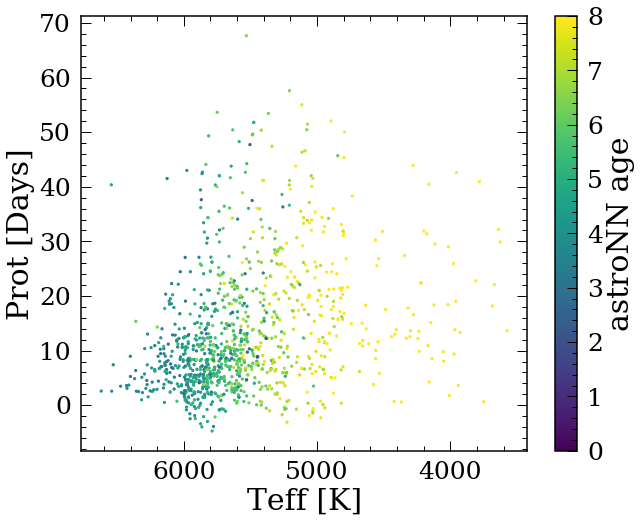

In [148]:
plt.figure(figsize=(10,8))
plt.scatter(solarstars['TEFF'],solarstars['Prot'],s=5,c=solarstars['age'],vmin=0,vmax=8)
plt.xlabel('Teff [K]')
plt.ylabel('Prot [Days]')
plt.gca().invert_xaxis()
#plt.xlim([3000,7000])
#plt.ylim([0,50])
cb=plt.colorbar()
cb.set_label('astroNN age')




M_H 1108


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

C_FE 1103
N_FE 1039
O_FE 155
NA_FE 91
MG_FE 1107
AL_FE 1106
SI_FE 1107
S_FE 1062
K_FE 1072
CA_FE 1105
TI_FE 845
V_FE 274
MN_FE 1099
NI_FE 1107
P_FE 69
CR_FE 1021
CO_FE 946
RB_FE 0
[[0.02828906 0.07054735 0.15507853 0.09712291 0.47140796 0.06670685
  0.09845254 0.06454325 0.11192403 0.16512099 0.09248559 0.19147459
  0.20280988 0.07280038 0.06778783 0.32592304 0.33970989 0.47982267
  0.        ]
 [0.02663516 0.06913536 0.17762153 0.06641094 0.79638287 0.07231111
  0.1067021  0.07695884 0.15883158 0.1659359  0.07887761 0.24447448
  0.15969148 0.05852311 0.055524   0.19481724 0.35065865 0.38578899
  0.        ]]


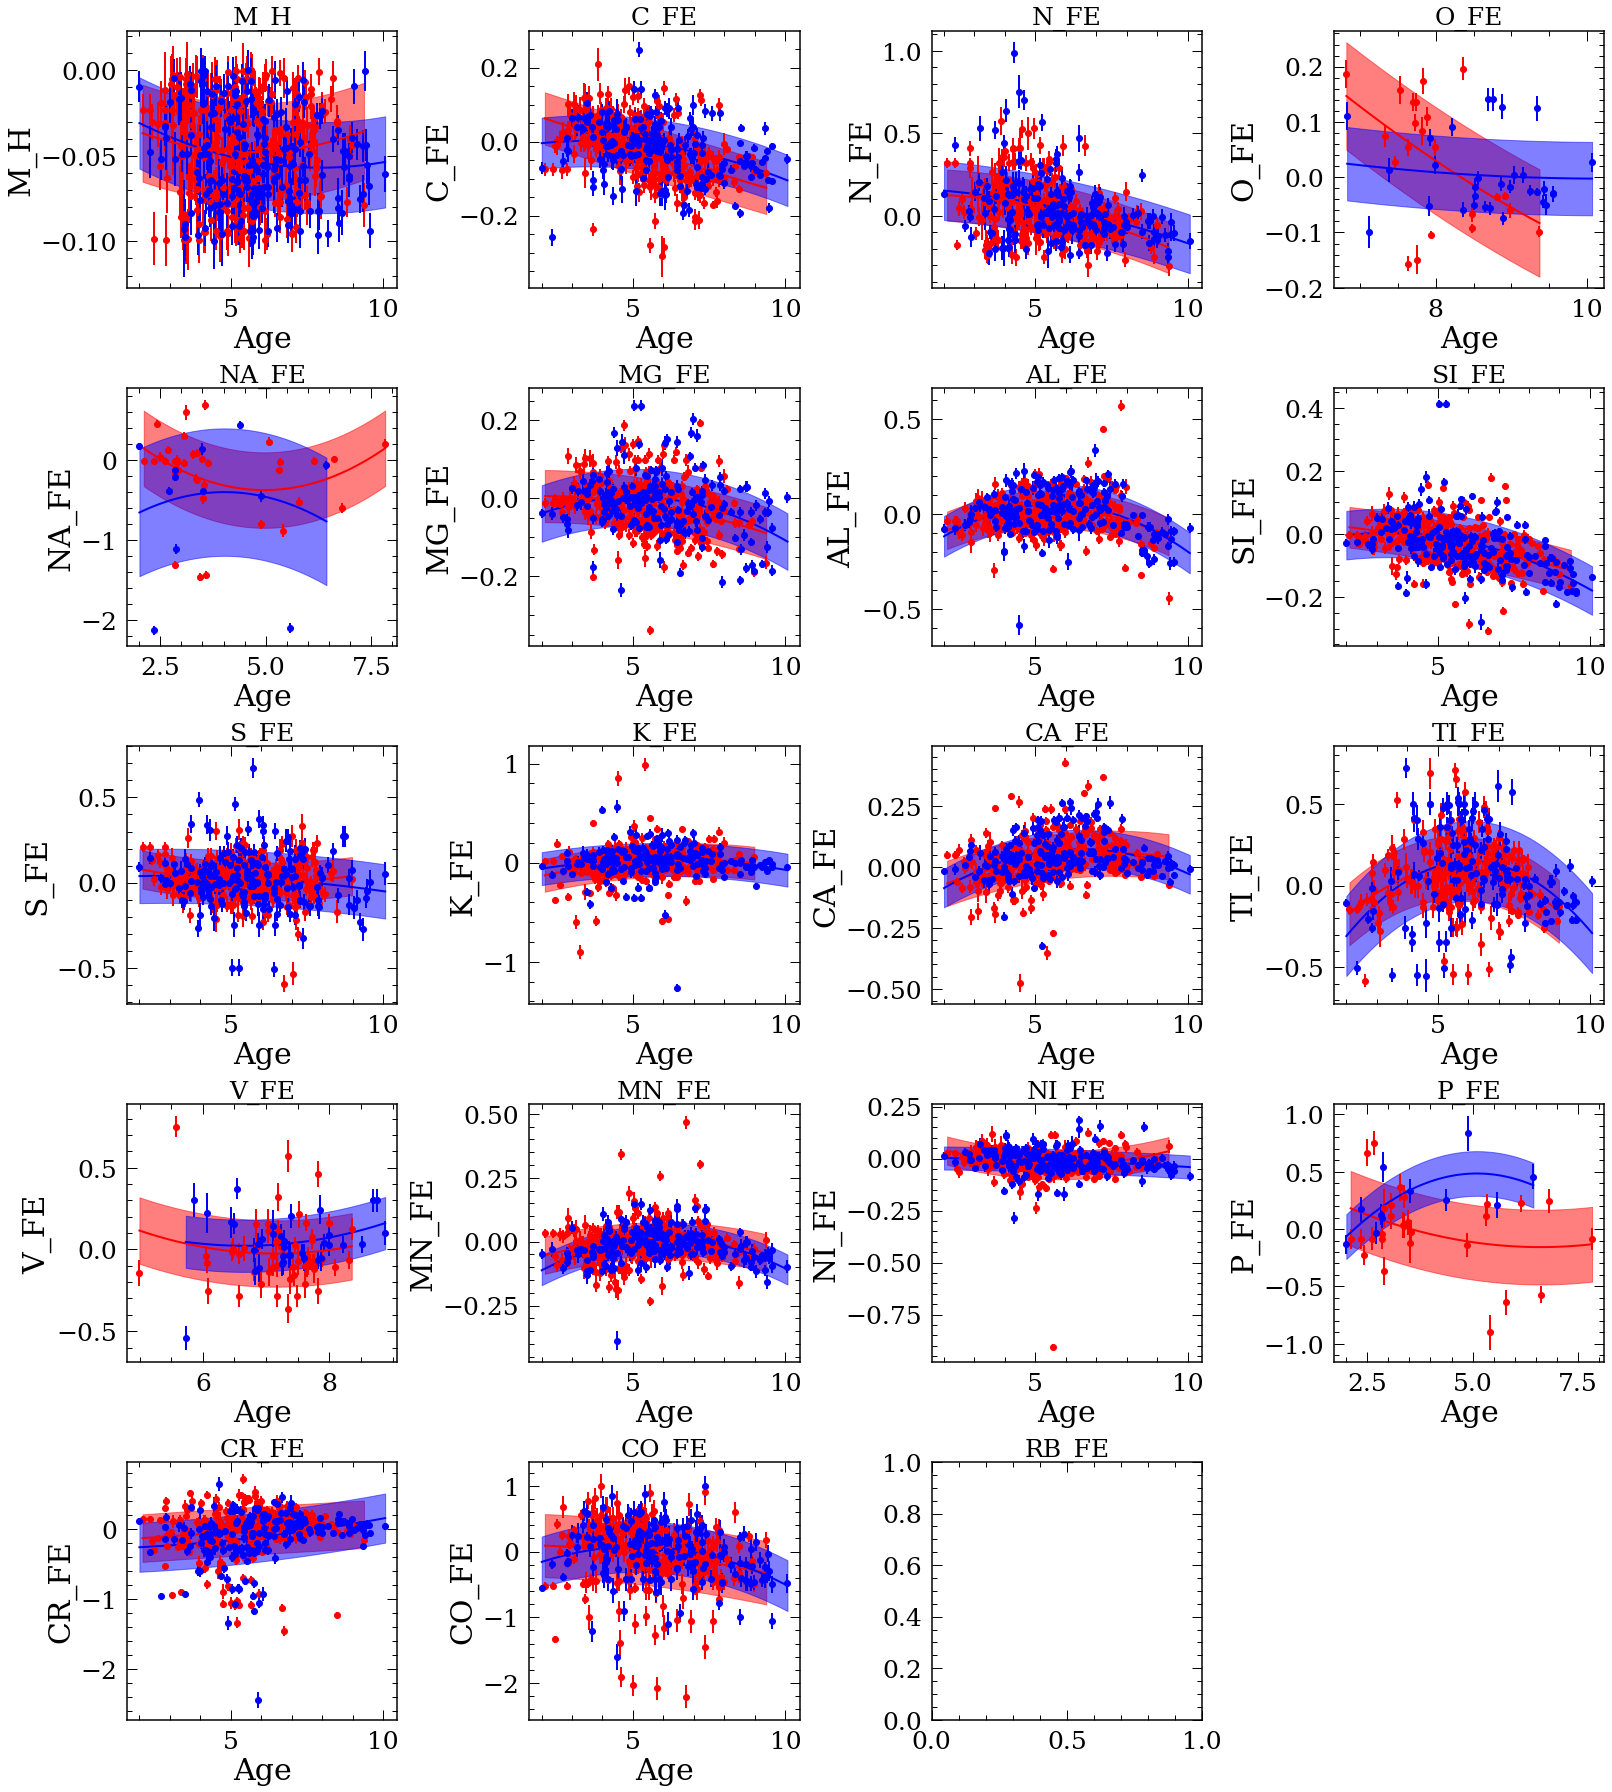

In [149]:

abund,disp=plotagedis(5,15,10,solarstars)


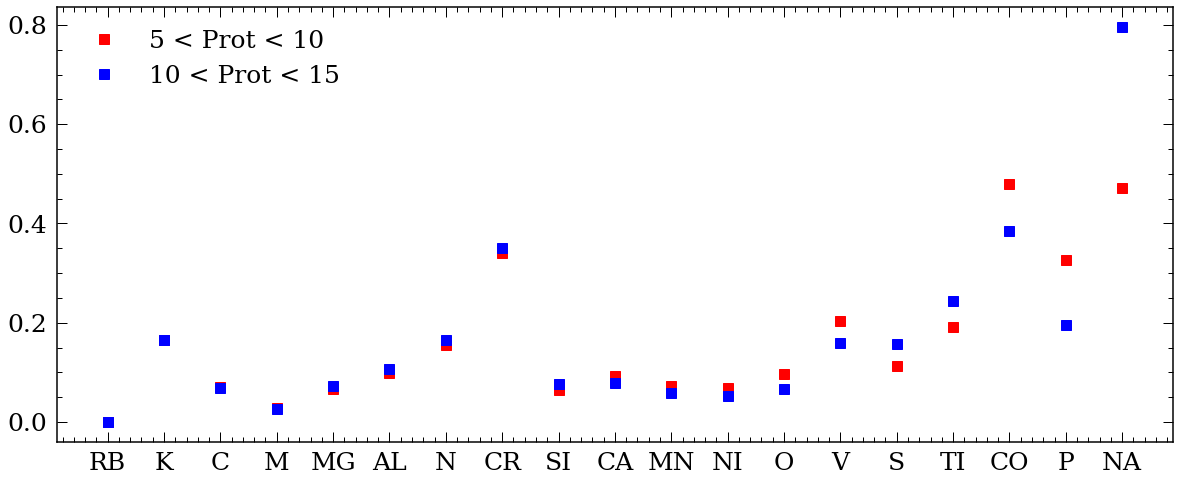

In [105]:
plt.figure(figsize=(20,8))
abds=[i.split('_')[0] for i in abund]
df=pd.DataFrame(np.array((abds,disp[0,:],disp[1,:])).T,columns=['abund','low_prot','hi_prot'])

df['low_prot']=np.asarray(df['low_prot'],dtype=float)
df['hi_prot']=np.asarray(df['hi_prot'],dtype=float)

df['diff']=abs(df['low_prot']-df['hi_prot'])
df=df.sort_values(by='diff')

plt.plot(df['abund'],df['low_prot'],'rs',fillstyle='full',markersize=10,label='5 < Prot < 10')
plt.plot(df['abund'],df['hi_prot'],'bs',fillstyle='full',markersize=10,label='10 < Prot < 15')
plt.legend()

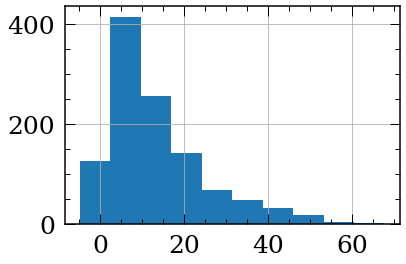

In [106]:
solarstars['Prot'].hist()

553 552


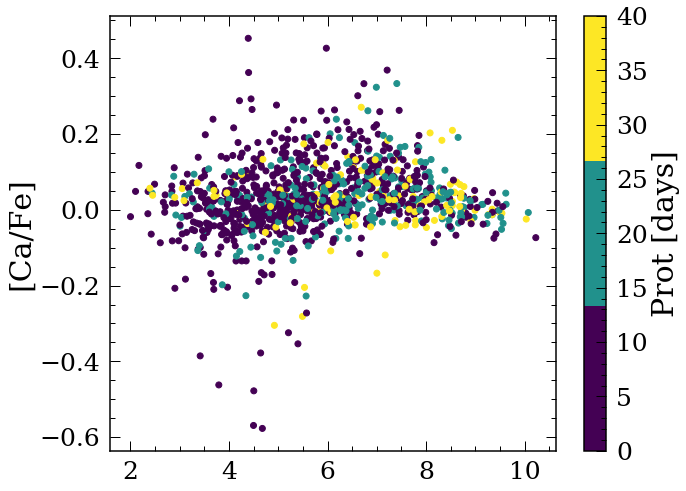

In [107]:

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',3)
solarstars=solarstars.loc[solarstars['CA_FE']>-100]
plt.scatter(solarstars['age'],solarstars['CA_FE'],c=solarstars['Prot'],cmap=cm,vmin=0,vmax=40)
plt.ylabel('[Ca/Fe]')
cb=plt.colorbar()
cb.set_label('Prot [days]')
print(sum(solarstars['Prot']>10),sum(solarstars['Prot']<10))



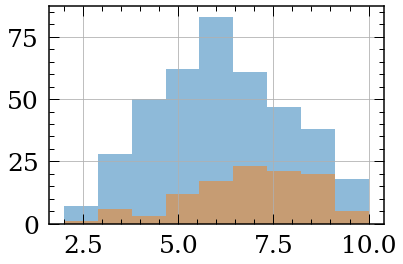

In [160]:
protcuts=[10,25,40]
for i in range(len(protcuts)-1):
    m=(solarstars['Prot']>protcuts[i])&(solarstars['Prot']<protcuts[i+1])
    protlim=solarstars[m].reset_index(drop=True)
    protlim['age'].hist(bins=np.linspace(2,10,10),alpha=0.5)

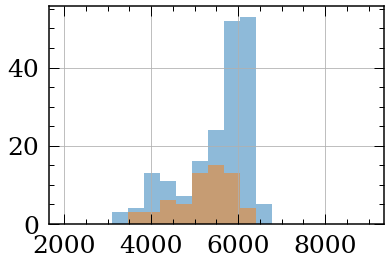

In [162]:
for i in range(len(protcuts)-1):
    m=(solarstars['Prot']>protcuts[i])&(solarstars['Prot']<protcuts[i+1])
    protlim=solarstars[m].reset_index(drop=True)
    protlim['teff'].hist(bins=np.linspace(2000,9000,20),alpha=0.5)

188


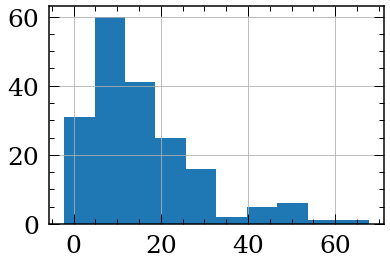

In [172]:
solarstars_age=solarstars.loc[abs(solarstars['age']-6.5)<0.5].reset_index(drop=True)
solarstars_age['Prot'].hist()
print(len(solarstars_age))

M_H 188


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

C_FE 187
N_FE 185
O_FE 7
NA_FE 7
MG_FE 188
AL_FE 188
SI_FE 188
S_FE 188
K_FE 187
CA_FE 188
TI_FE 174
V_FE 75
MN_FE 188
NI_FE 188
P_FE 7
CR_FE 186
CO_FE 160
RB_FE 0
[[0.02326242 0.08302223 0.13046279 0.         0.         0.07925593
  0.10595321 0.08060519 0.14487669 0.24606058 0.08451938 0.22794053
  0.20038633 0.06031895 0.05567609 0.         0.37361202 0.35508064
  0.        ]
 [0.02420182 0.05552851 0.07168055 0.         0.         0.06947539
  0.09909245 0.06919365 0.11747415 0.20444804 0.08455058 0.11607385
  0.15608297 0.03982354 0.03213076 0.         0.4805413  0.35915748
  0.        ]]


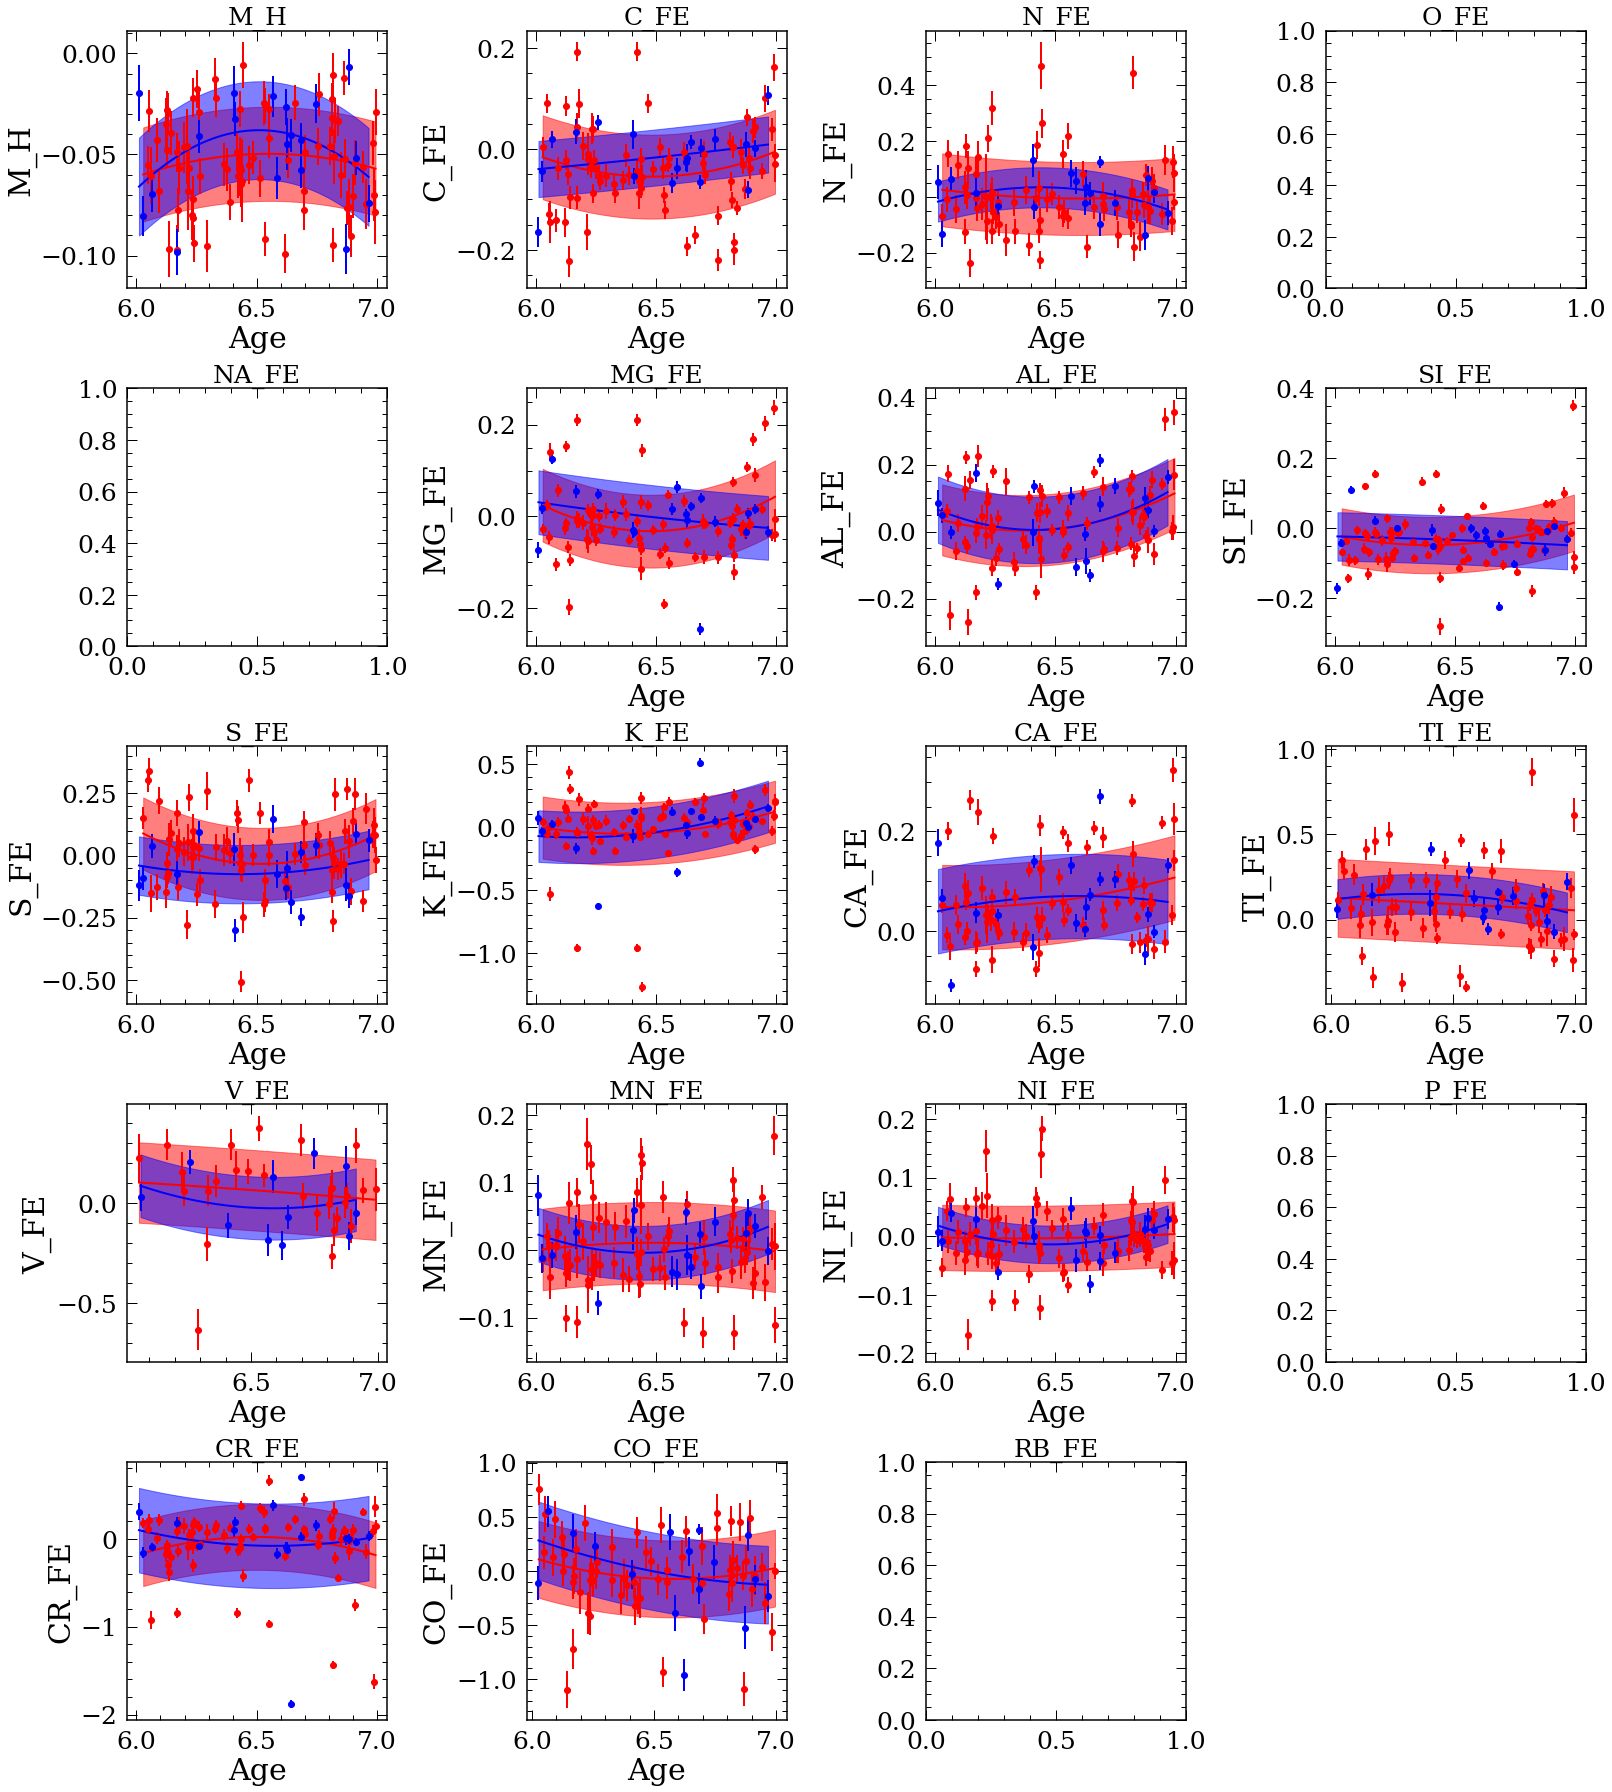

In [173]:

abund,disp_67=plotagedis(10,40,25,solarstars_age)


M_H 169
C_FE 168


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

N_FE 167
O_FE 43
NA_FE 2
MG_FE 169
AL_FE 169
SI_FE 169
S_FE 168
K_FE 168
CA_FE 169
TI_FE 166
V_FE 140
MN_FE 169
NI_FE 169
P_FE 2
CR_FE 169
CO_FE 160
RB_FE 0
[[0.02798591 0.06270529 0.12194284 0.08779144 0.         0.0648588
  0.11287057 0.0614145  0.1544204  0.16109577 0.07611303 0.19283289
  0.09708159 0.04828572 0.04756065 0.         0.33503338 0.35542634
  0.        ]
 [0.02457438 0.04764366 0.08154112 0.00675575 0.         0.10334292
  0.14587495 0.05633103 0.09460382 0.12840542 0.05474916 0.16441336
  0.14005021 0.03318465 0.0343744  0.         0.23784464 0.26660329
  0.        ]]


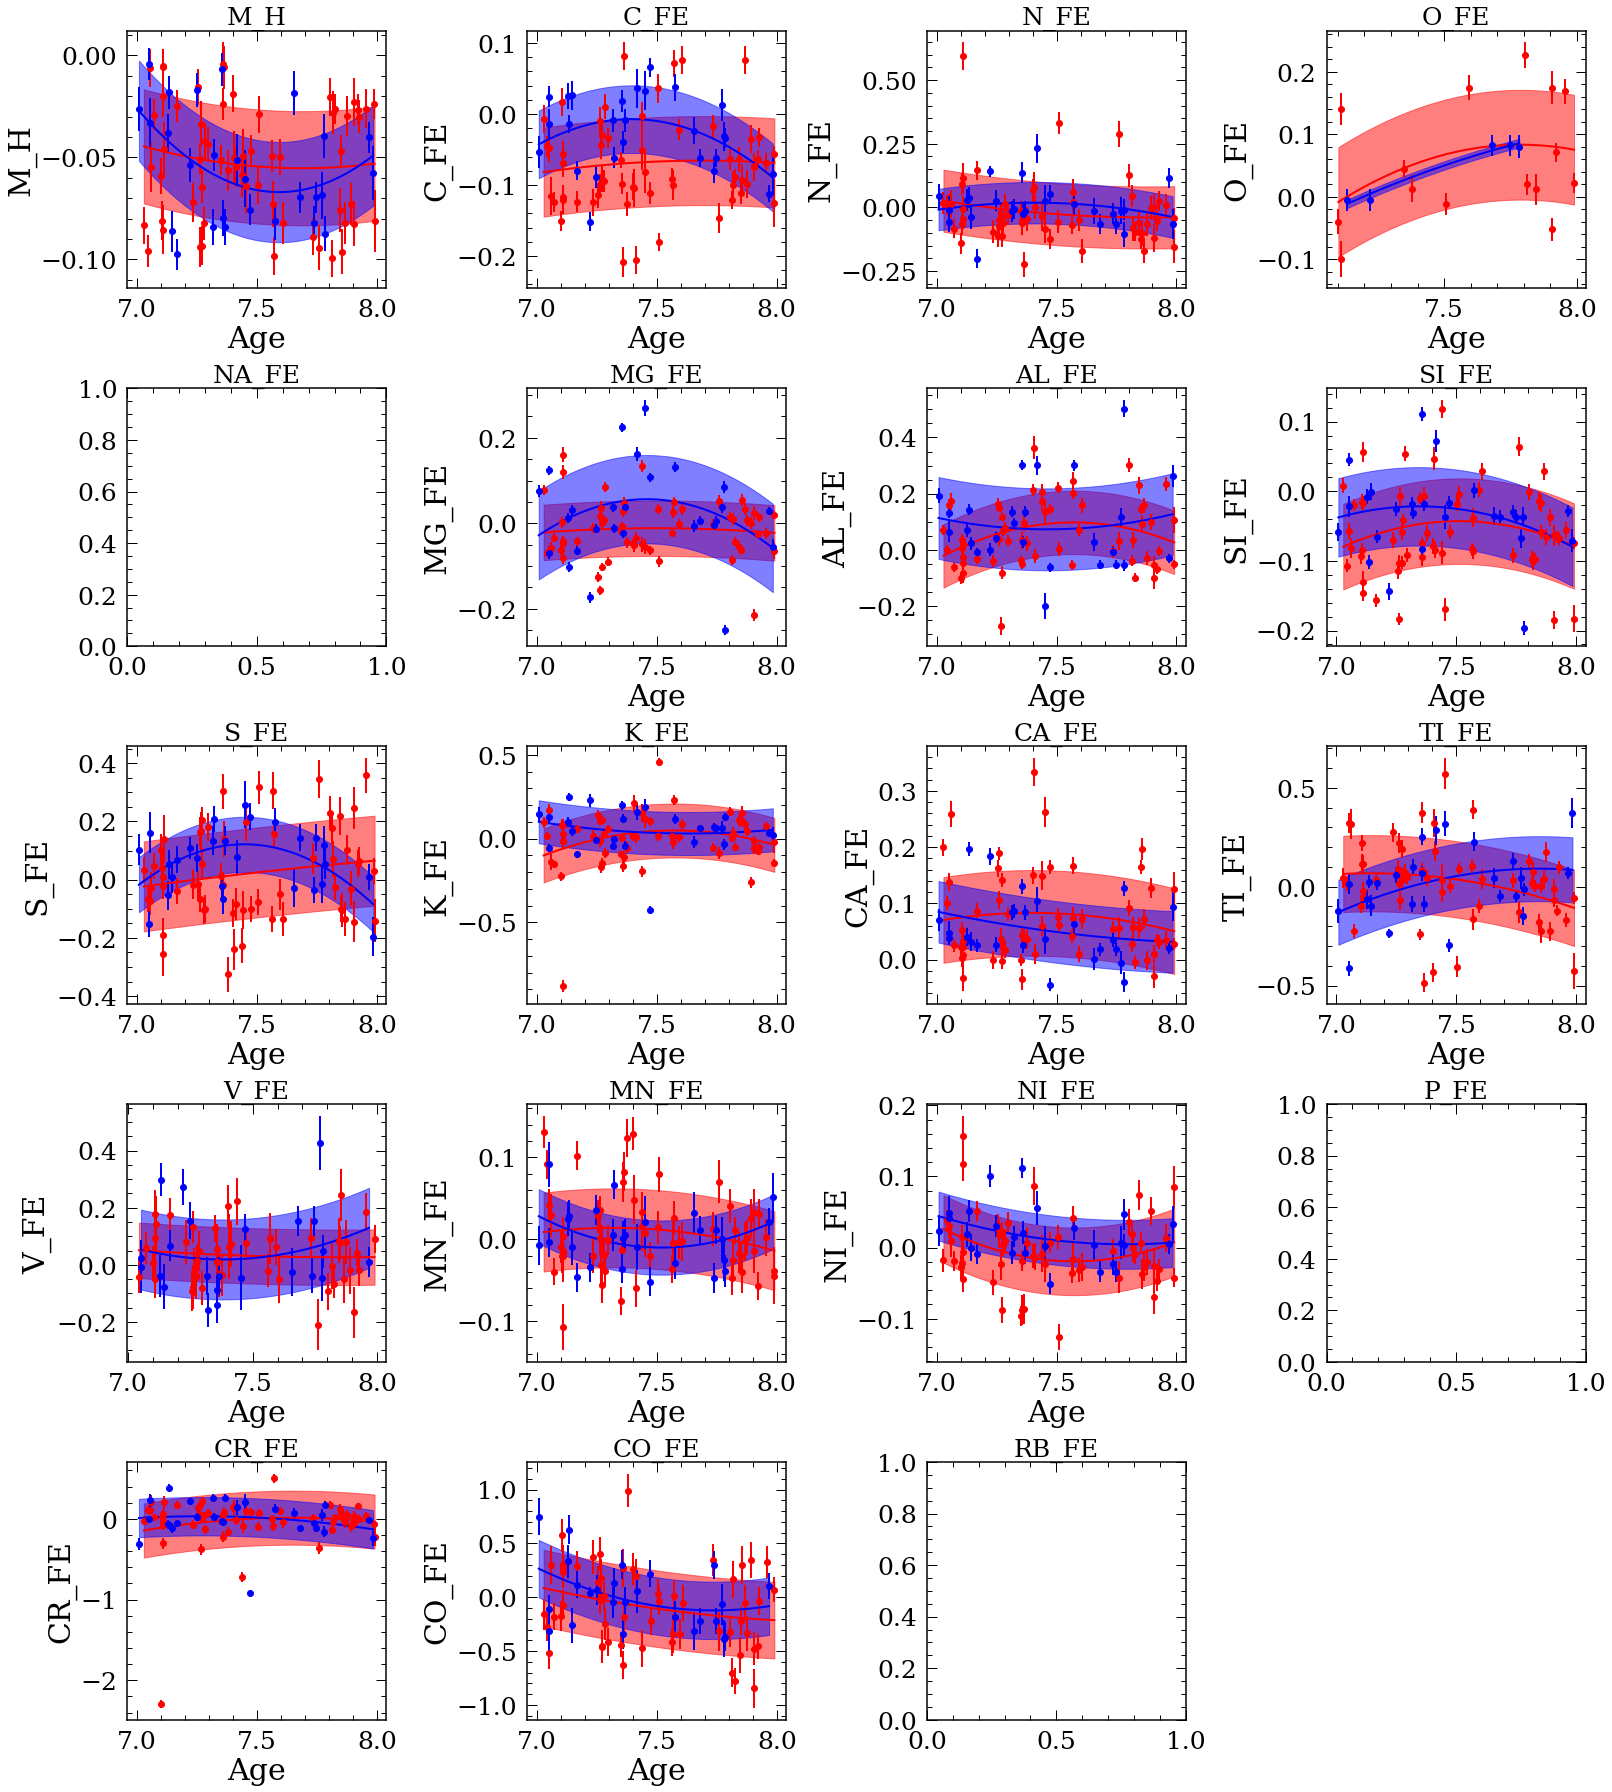

In [174]:
solarstars_age=solarstars.loc[abs(solarstars['age']-7.5)<0.5].reset_index(drop=True)
abund,disp_78=plotagedis(10,40,25,solarstars_age)

M_H 95
C_FE 95


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

N_FE 87
O_FE 75
NA_FE 2
MG_FE 95
AL_FE 95
SI_FE 95
S_FE 66
K_FE 81
CA_FE 95
TI_FE 81
V_FE 42
MN_FE 88
NI_FE 95
P_FE 2
CR_FE 88
CO_FE 94
RB_FE 0
[[0.02523422 0.05658444 0.07855372 0.08658472 0.         0.07081088
  0.10145272 0.05545132 0.16493862 0.07728422 0.04231381 0.11860967
  0.21638538 0.04691462 0.0463896  0.         0.10985142 0.27214619
  0.        ]
 [0.02806012 0.05496706 0.07402366 0.04637256 0.         0.07389908
  0.12543913 0.04536419 0.10943459 0.11898728 0.04477357 0.16890432
  0.13510673 0.03723164 0.07276204 0.         0.07808369 0.19368105
  0.        ]]


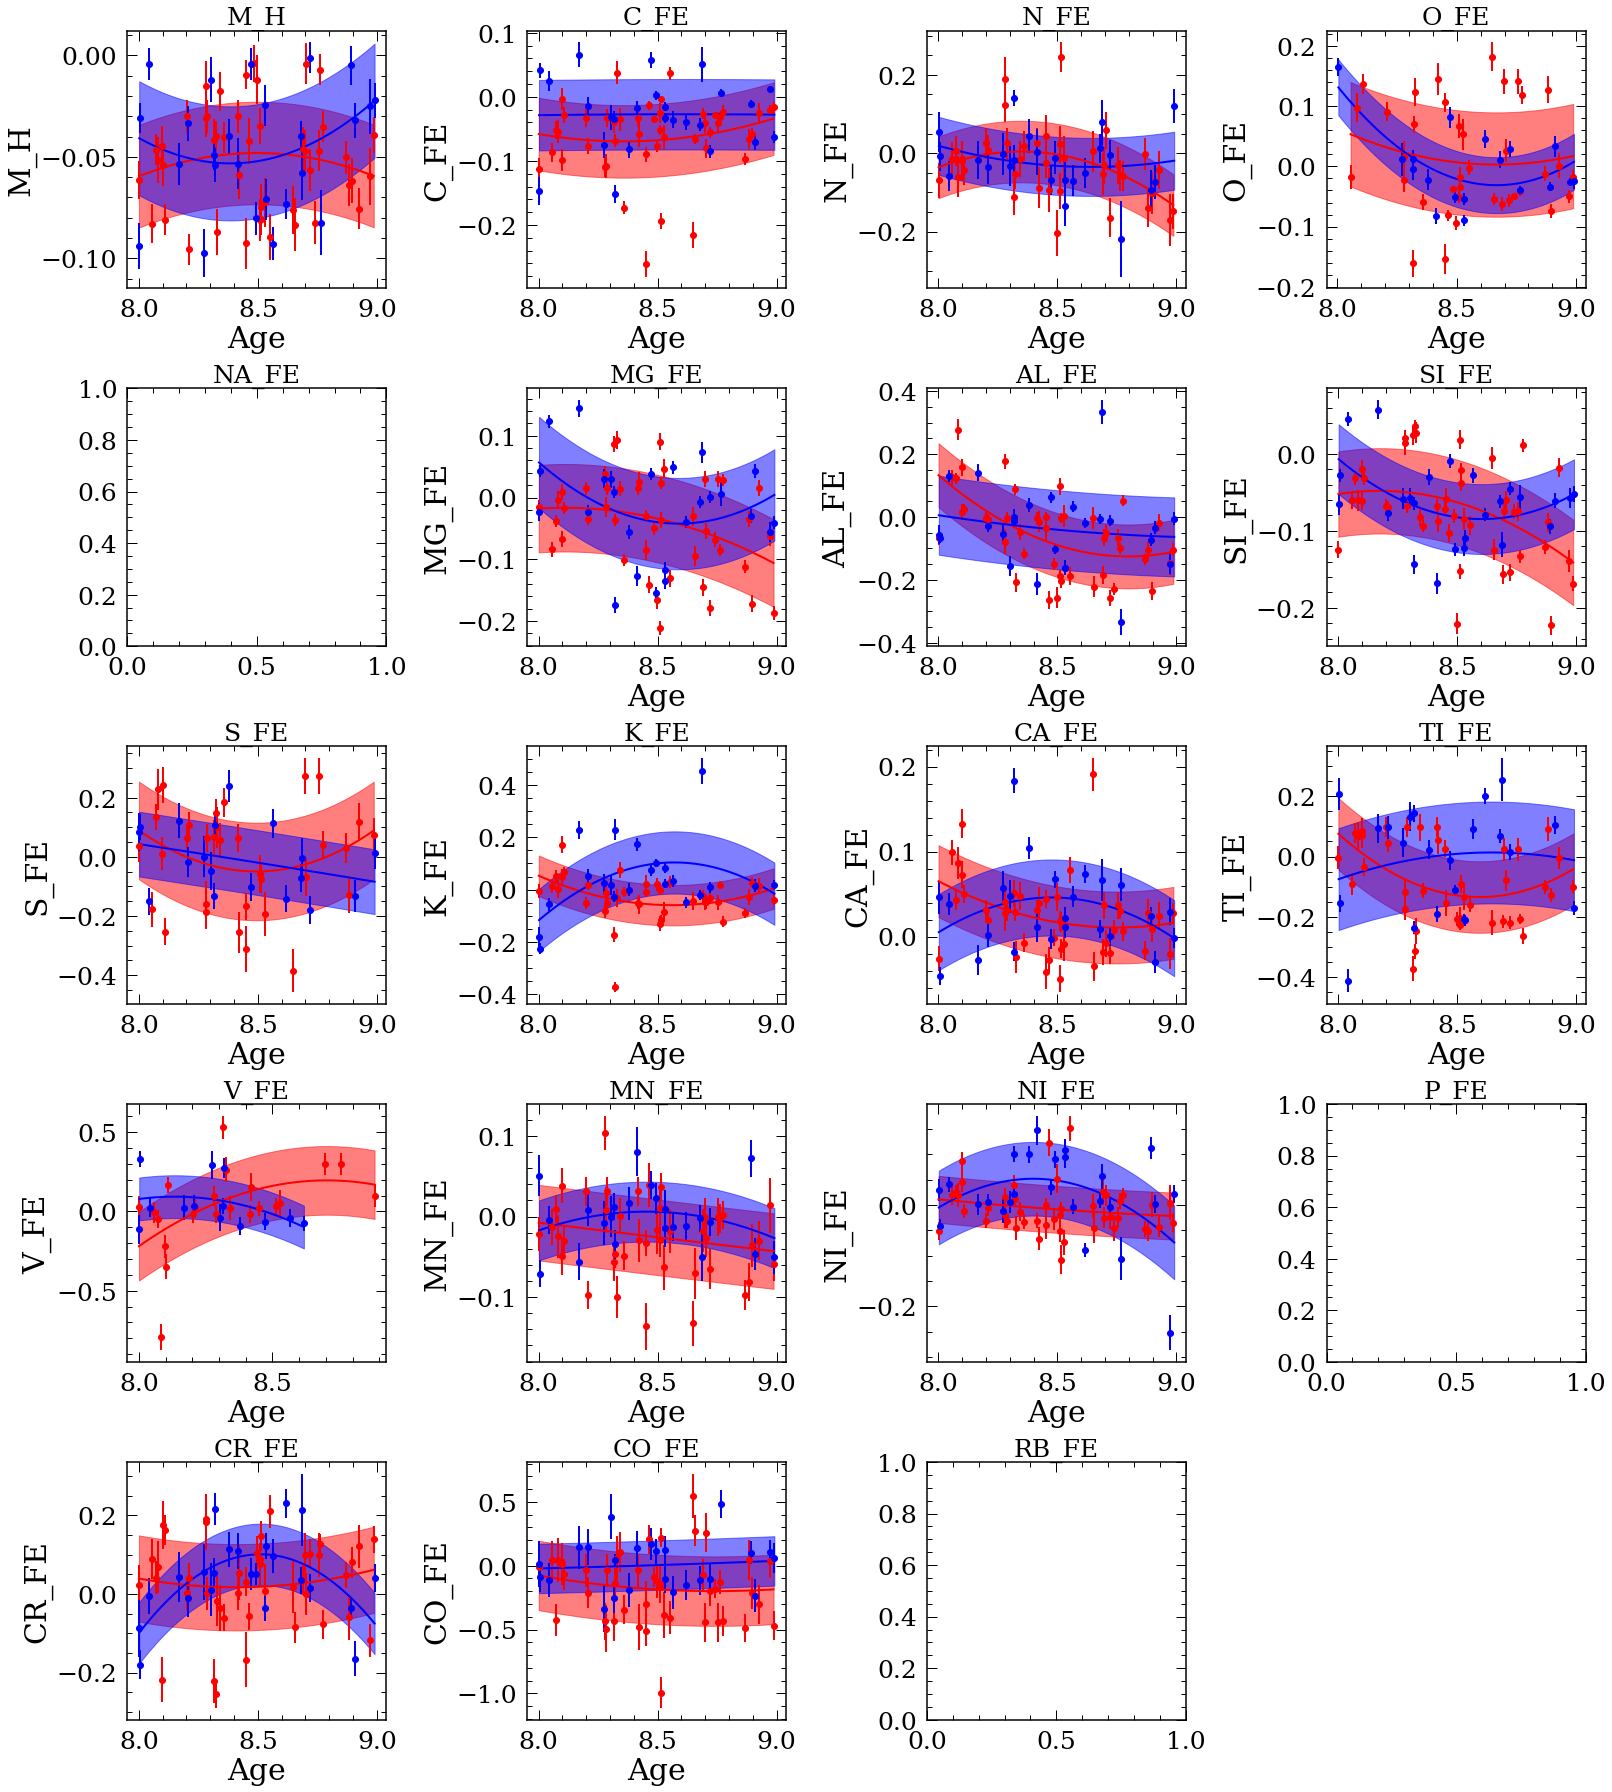

In [175]:
solarstars_age=solarstars.loc[abs(solarstars['age']-8.5)<0.5].reset_index(drop=True)
abund,disp_89=plotagedis(10,40,25,solarstars_age)

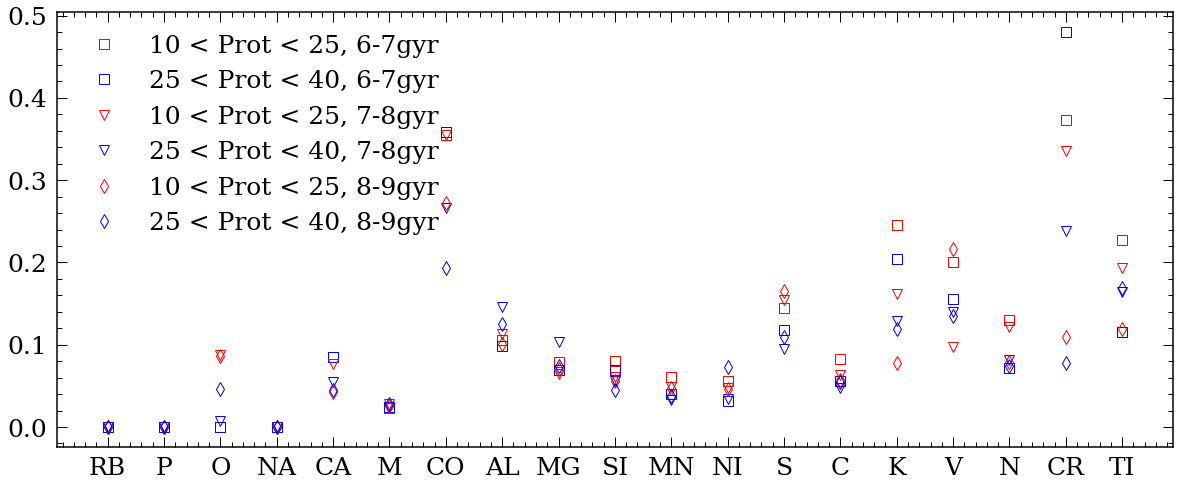

In [182]:
# age from 8-9 Gyr
plt.figure(figsize=(20,8))
abds=[i.split('_')[0] for i in abund]
df=pd.DataFrame(np.array((abds,disp_67[0,:],disp_67[1,:],disp_78[0,:],disp_78[1,:],
                         disp_89[0,:],disp_89[1,:])).T,columns=['abund','low_prot_67','hi_prot_67',
                                                               'low_prot_78','hi_prot_78',
                                                               'low_prot_89','hi_prot_89'])

df['low_prot_67']=np.asarray(df['low_prot_67'],dtype=float)
df['hi_prot_67']=np.asarray(df['hi_prot_67'],dtype=float)
df['low_prot_78']=np.asarray(df['low_prot_78'],dtype=float)
df['hi_prot_78']=np.asarray(df['hi_prot_78'],dtype=float)
df['low_prot_89']=np.asarray(df['low_prot_89'],dtype=float)
df['hi_prot_89']=np.asarray(df['hi_prot_89'],dtype=float)

df['diff']=abs(df['low_prot_67']-df['hi_prot_67'])
df=df.sort_values(by='diff')

plt.plot(df['abund'],df['low_prot_67'],'rs',fillstyle='none',markersize=10,label='10 < Prot < 25, 6-7gyr')
plt.plot(df['abund'],df['hi_prot_67'],'bs',fillstyle='none',markersize=10,label='25 < Prot < 40, 6-7gyr')

plt.plot(df['abund'],df['low_prot_78'],'rv',fillstyle='none',markersize=10,label='10 < Prot < 25, 7-8gyr')
plt.plot(df['abund'],df['hi_prot_78'],'bv',fillstyle='none',markersize=10,label='25 < Prot < 40, 7-8gyr')

plt.plot(df['abund'],df['low_prot_89'],'rd',fillstyle='none',markersize=10,label='10 < Prot < 25, 8-9gyr')
plt.plot(df['abund'],df['hi_prot_89'],'bd',fillstyle='none',markersize=10,label='25 < Prot < 40, 8-9gyr')
plt.legend(loc=2)